<a href="https://colab.research.google.com/github/hmarathe420/Diabetes_Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**    - Diabetes Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**            - Harshal Marathe

## **Project Summary -**

As an AIML intern at InternPE, I undertook a project focused on Diabetes Classification, leveraging machine learning techniques to predict the likelihood of individuals developing diabetes based on their medical and lifestyle attributes.

**Project Components:**

* Data Understanding: The project began with a comprehensive exploration of the dataset containing medical and lifestyle attributes. This step involved understanding the data's structure, variables, and underlying patterns.

* Exploratory Data Analysis (EDA) and Visualization: Through exploratory data analysis, I delved deeper into the dataset's characteristics, uncovering insights, correlations, and potential trends. Visualizations were used to present key findings effectively.

* Classification Algorithms: To predict diabetes, I employed a variety of classification algorithms, including Logistic Regression, Random Forest, and others. Each algorithm was implemented and fine-tuned to suit the specific problem.

* Model Performance Metrics: For evaluating model performance, I utilized a range of metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. These metrics provided a comprehensive assessment of how well the models classified diabetes cases.

* Best Performer Model Selection: After evaluating different models, I identified the best-performing algorithm based on its overall performance metrics. This selection was crucial in determining the final model for deployment.

* Conclusion: The project's culmination led to a conclusive summary of findings and outcomes. I highlighted the strengths and limitations of the classification models and provided insights into the implications of the predictive results.

**Project Deliverables:**

Comprehensive data understanding and EDA documentation highlighting the dataset's characteristics and trends.
Visualizations to showcase key insights gained during EDA.
Implementation and evaluation of various classification algorithms, documented in code and accompanied by performance metrics.
Selection of the best-performing classification model, justified with supporting metrics and reasoning.
A conclusive project conclusion summarizing findings, model performance, and potential real-world implications.

**Project Impact:**

This project's significance lies in its potential to contribute to early diabetes detection, allowing individuals to proactively manage their health. The insights gained from EDA and the performance of various classification algorithms provide a valuable foundation for informed decision-making in healthcare settings.



## **GitHub Link -**

Provide your GitHub Link here.

## **Problem Statement**


Diabetes is a prevalent chronic health condition with significant implications for individuals' well-being. Early detection of diabetes can lead to timely interventions and improved management. Leveraging machine learning techniques to classify individuals' diabetes risk based on medical and lifestyle attributes has emerged as a promising approach.

As an AIML intern at InternPE, my task with developing a robust machine learning model that classifies individuals as either diabetic or non-diabetic based on their medical and lifestyle attributes. The goal is to create an accurate classification system that assists in identifying individuals who may be at risk of developing diabetes.

## **Data Collection & Understanding**

In [136]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier


In [137]:
# Mounting Google Drive with Google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
# loading dataset from drive
df = pd.read_csv("/content/drive/MyDrive/Diabetes Prediction/diabetes.csv")

In [139]:
# Top 5 rows of diabetes dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [140]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [141]:
# Describing the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [142]:
# shape of dataset
df.shape

(768, 9)

In [143]:
# number of duplicated rows of dataset
df.duplicated().sum()

0

In [144]:
# null values in dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From the above we can conclude that the diabetes dataset has 768 rows and 9 columns. and there is no any duplicated rows and null values present in the diabetes dataset.

## **EDA**

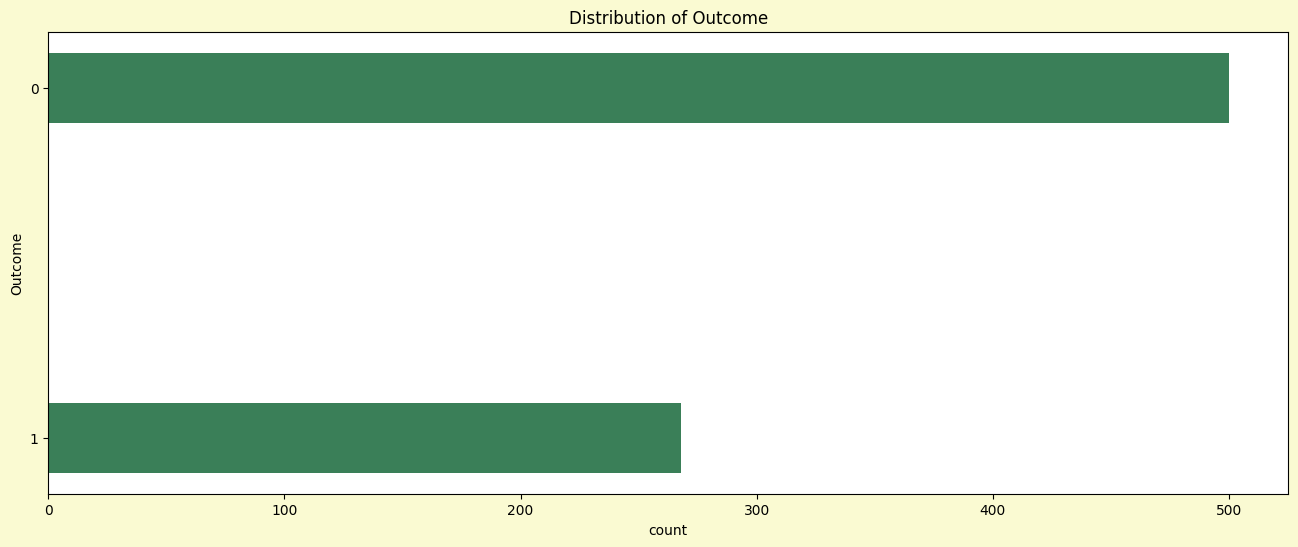

In [145]:
# Distribution of outcome column
plt.figure(figsize = (16,6), facecolor = 'lightgoldenrodyellow')
sns.countplot(data = df, y = 'Outcome', width = 0.2,palette = ['seagreen'])
plt.title("Distribution of Outcome")
plt.plot()
plt.show()

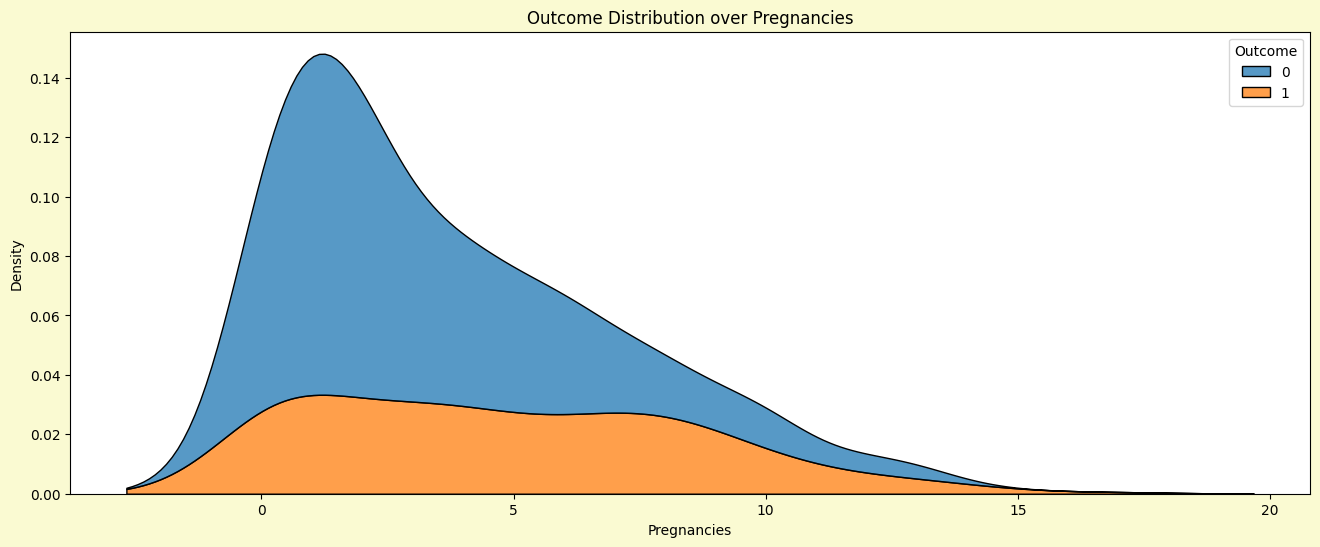

In [146]:
# Outcome distribution over Pregnancies
plt.figure(figsize = (16,6), facecolor = 'lightgoldenrodyellow')
sns.kdeplot(data = df , x = 'Pregnancies', hue = 'Outcome',multiple = "stack")
plt.title("Outcome Distribution over Pregnancies")
plt.plot()
plt.show()

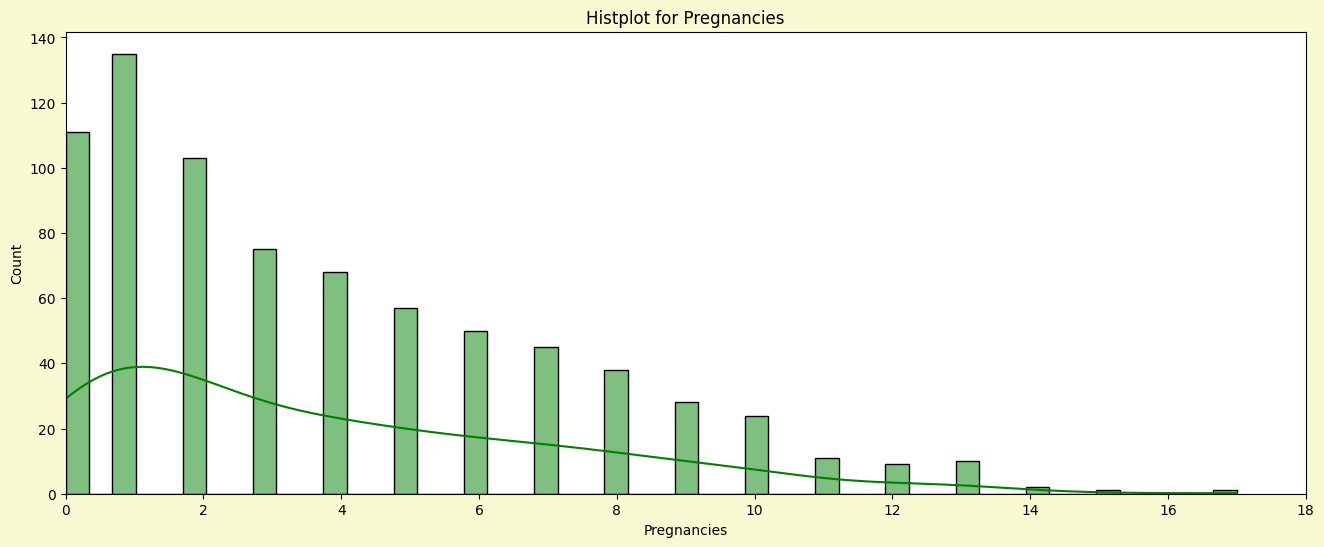

In [147]:
# ploting histplot for pregnancies
plt.figure(figsize = (16,6), facecolor = 'lightgoldenrodyellow')
sns.histplot(data =df , x = 'Pregnancies', bins = 50, color = 'green' , kde = True)
plt.title('Histplot for Pregnancies')
plt.xlim(0,18,1)
plt.plot()
plt.show()

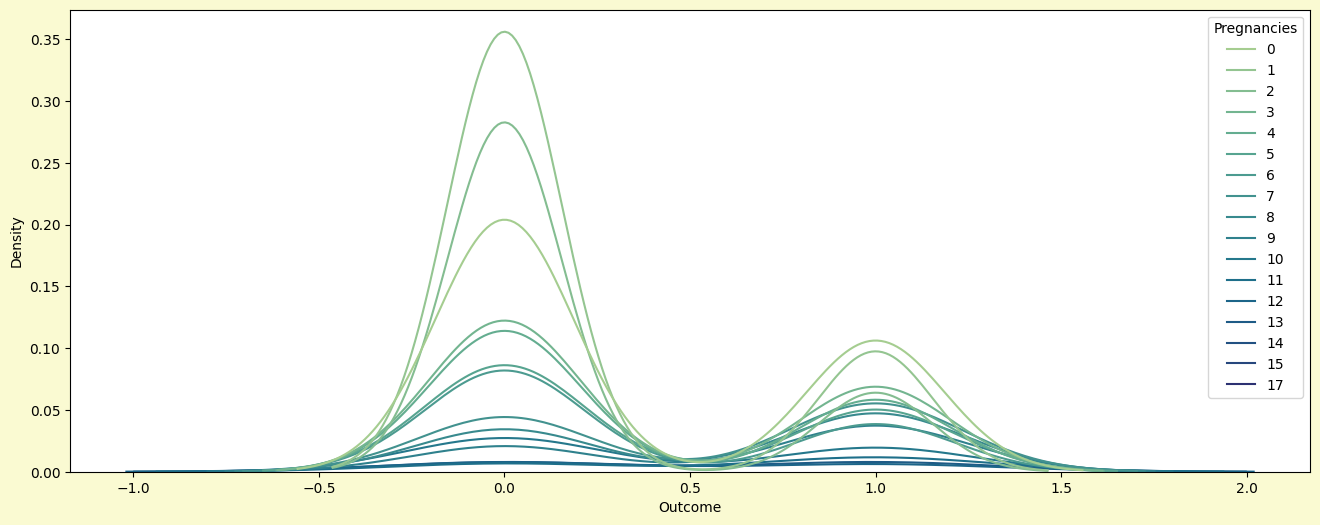

In [148]:
# ploting KDE plot for Pregnancies
plt.figure(figsize = (16,6), facecolor = 'lightgoldenrodyellow')
sns.kdeplot(data = df , x = 'Outcome', hue = 'Pregnancies', palette="crest")
plt.plot()
plt.show()

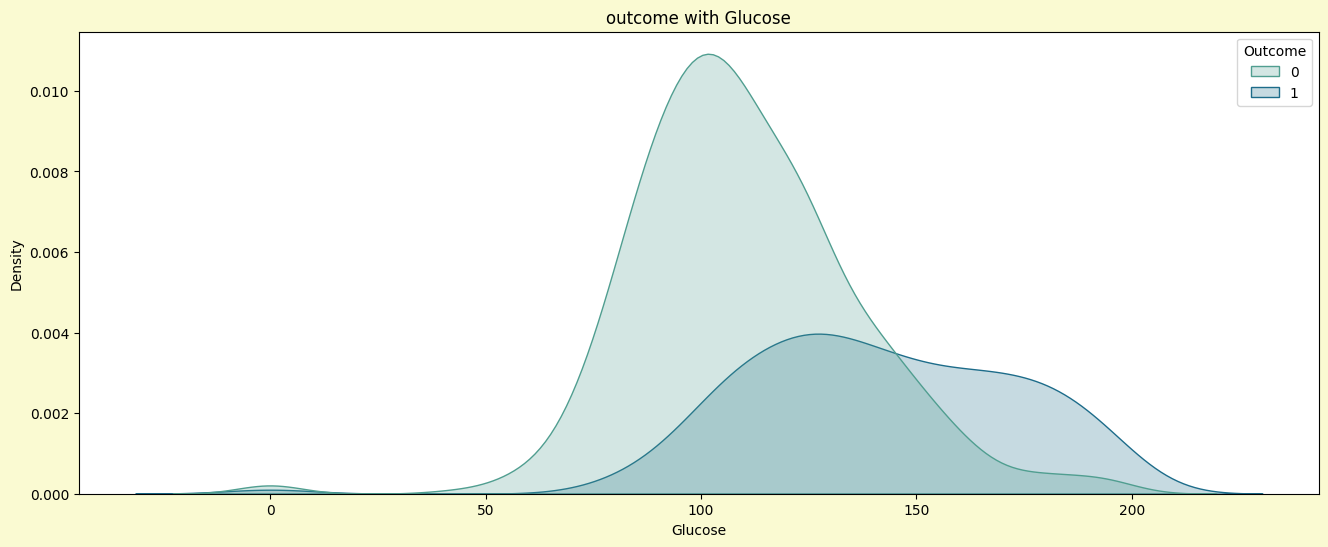

In [149]:
# ploting the KDEplot of GLUCOSE with outcomes
plt.figure(figsize = (16,6), facecolor = 'lightgoldenrodyellow')
sns.kdeplot(data =df , x = 'Glucose', hue = 'Outcome', fill = True, palette = "crest")
plt.title('outcome with Glucose')
plt.plot()
plt.show()

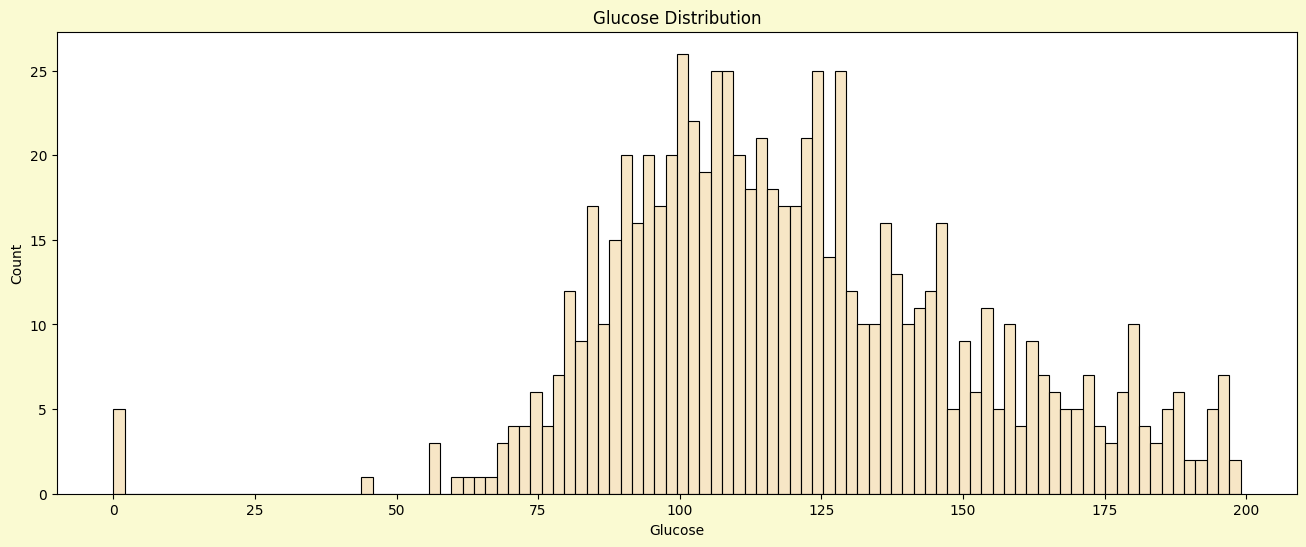

In [150]:
# ploting the glucose distribution with histplot
plt.figure(figsize = (16,6), facecolor = 'lightgoldenrodyellow')
sns.histplot(data =df , x = 'Glucose', bins = 100,color = 'wheat')
plt.title("Glucose Distribution")
plt.plot()
plt.show()

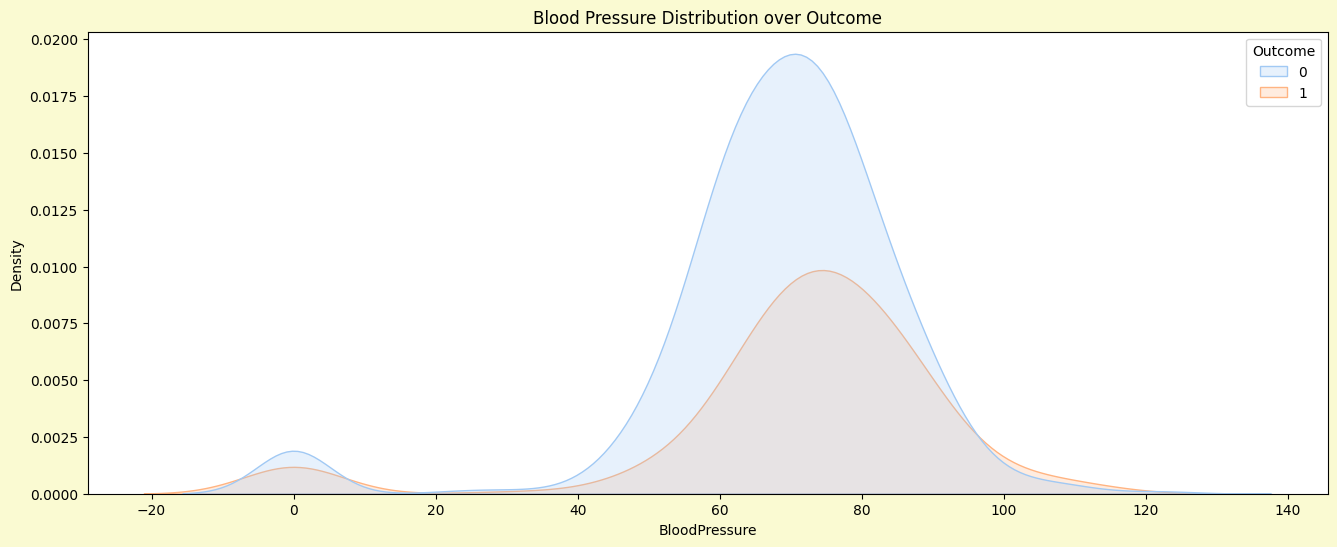

In [151]:
# BloodPressure distribution with outcome using KDEPLOT
plt.figure(figsize = (16,6), facecolor = 'lightgoldenrodyellow')
sns.kdeplot(data = df , x  = 'BloodPressure', hue = 'Outcome', fill =  True ,palette = 'pastel')
plt.title("Blood Pressure Distribution over Outcome")
plt.plot()
plt.show()

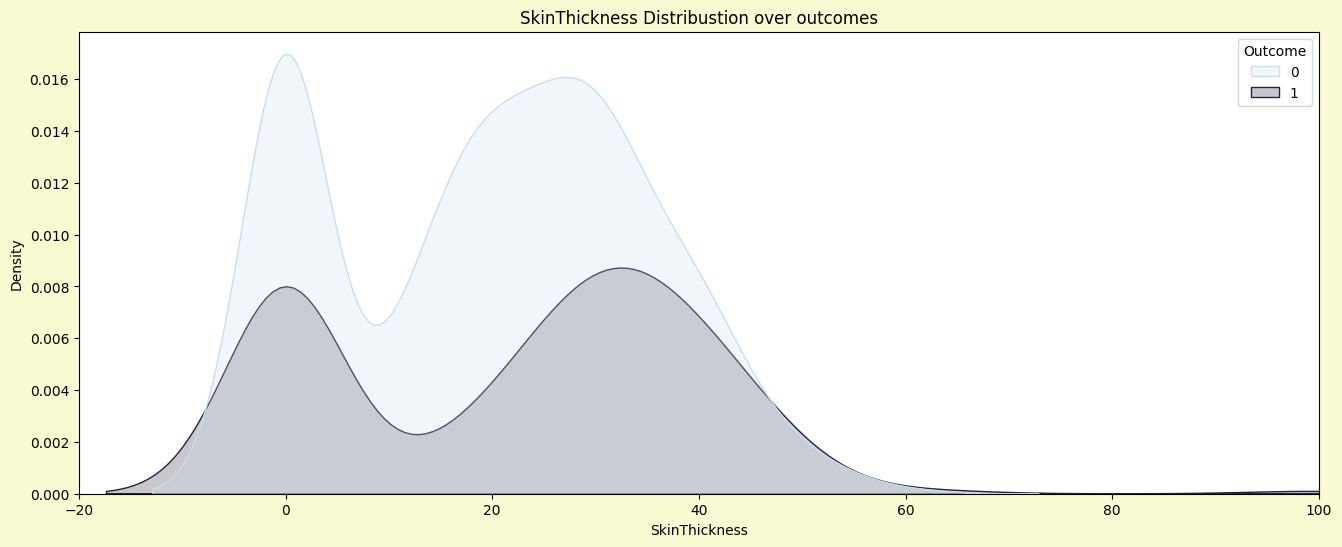

In [152]:
# ploting kdeplot for distribution of skinthickness over outcome
plt.figure(figsize = (16,6), facecolor = 'lightgoldenrodyellow')
sns.kdeplot(data = df , x = 'SkinThickness', hue = 'Outcome' ,palette = 'ch:s=.25,rot=-.25', fill = True)
plt.title("SkinThickness Distribustion over outcomes")
plt.xlim(-20,100)
plt.plot()
plt.show()

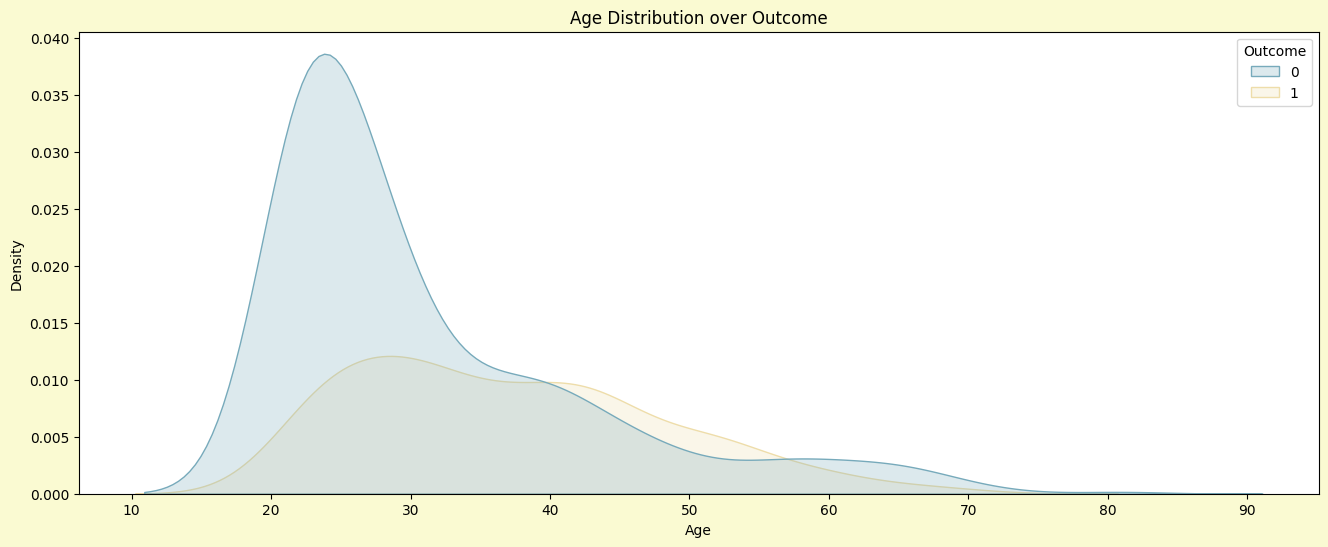

In [153]:
# ploting Age Distribution over outcome
plt.figure(figsize = (16,6), facecolor = 'lightgoldenrodyellow')
sns.kdeplot(data = df , x = 'Age', hue = 'Outcome', palette = 'blend:#7AB,#EDA', fill = True)
plt.title("Age Distribution over Outcome")
plt.plot()
plt.show()

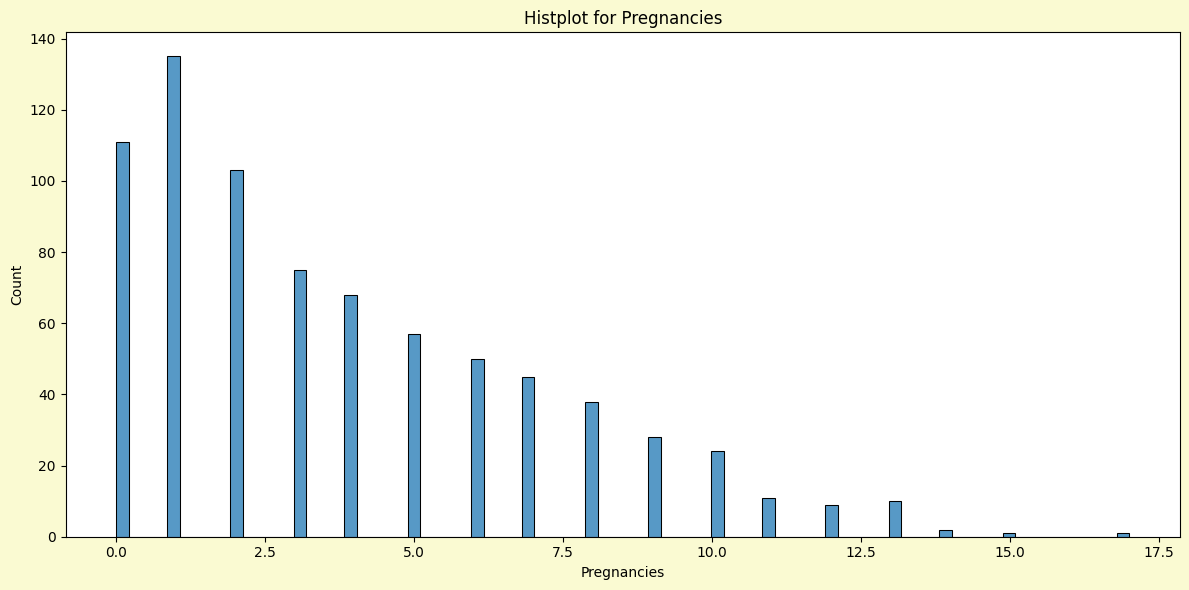

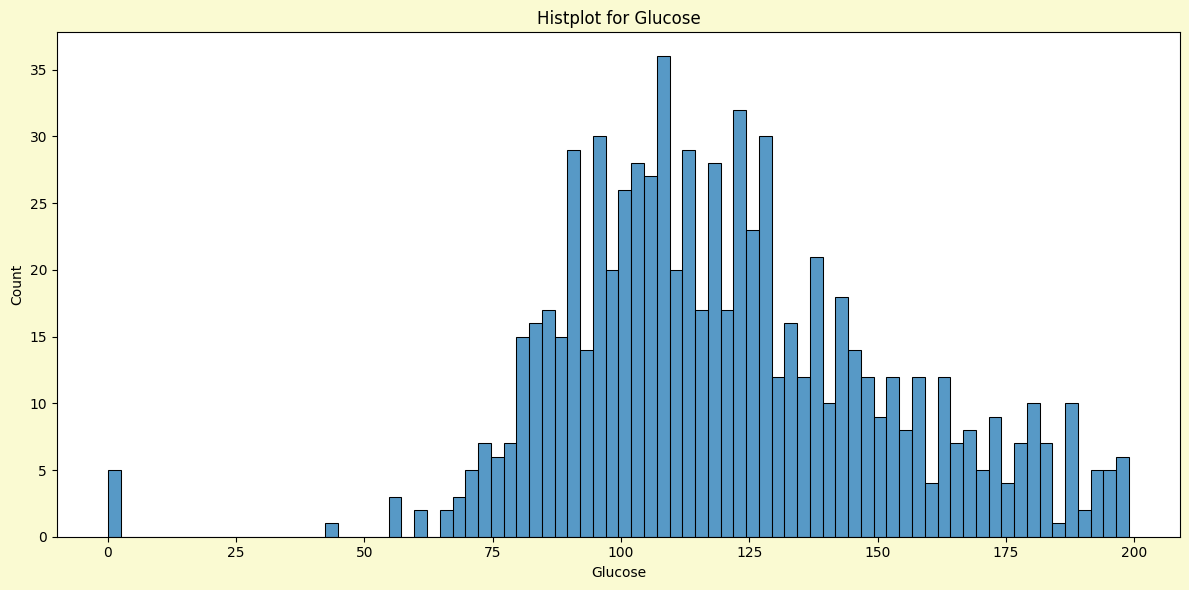

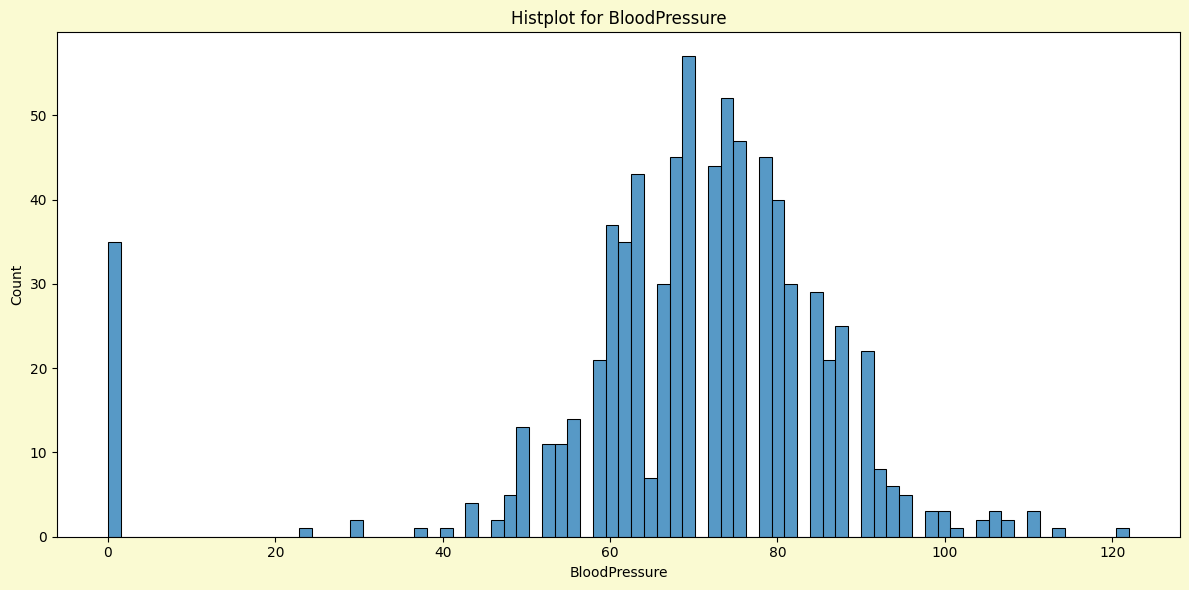

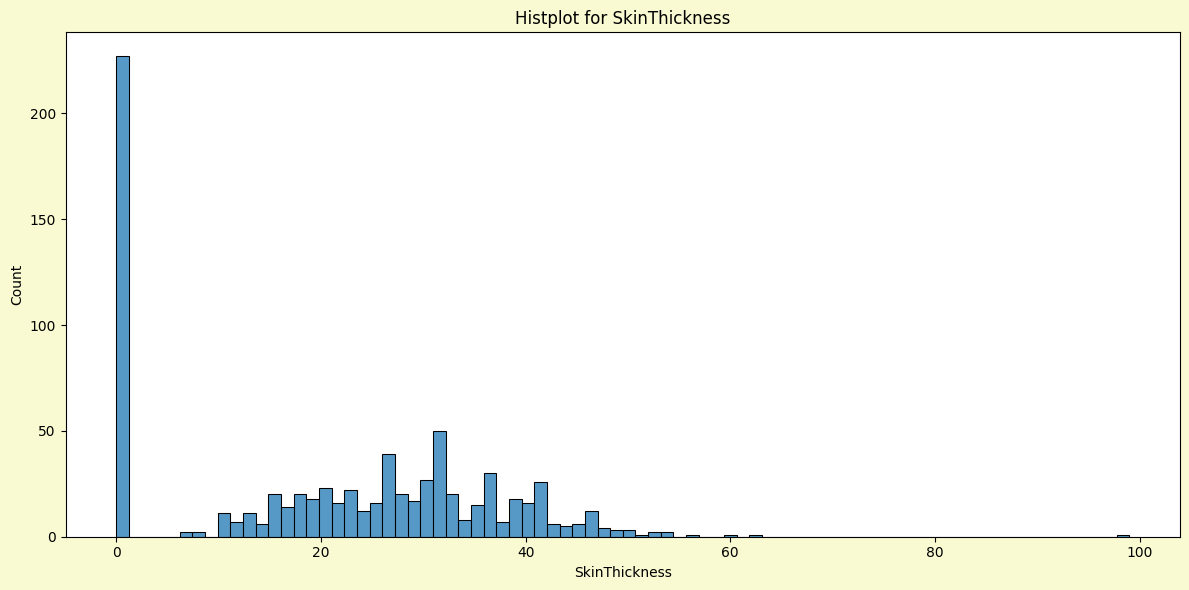

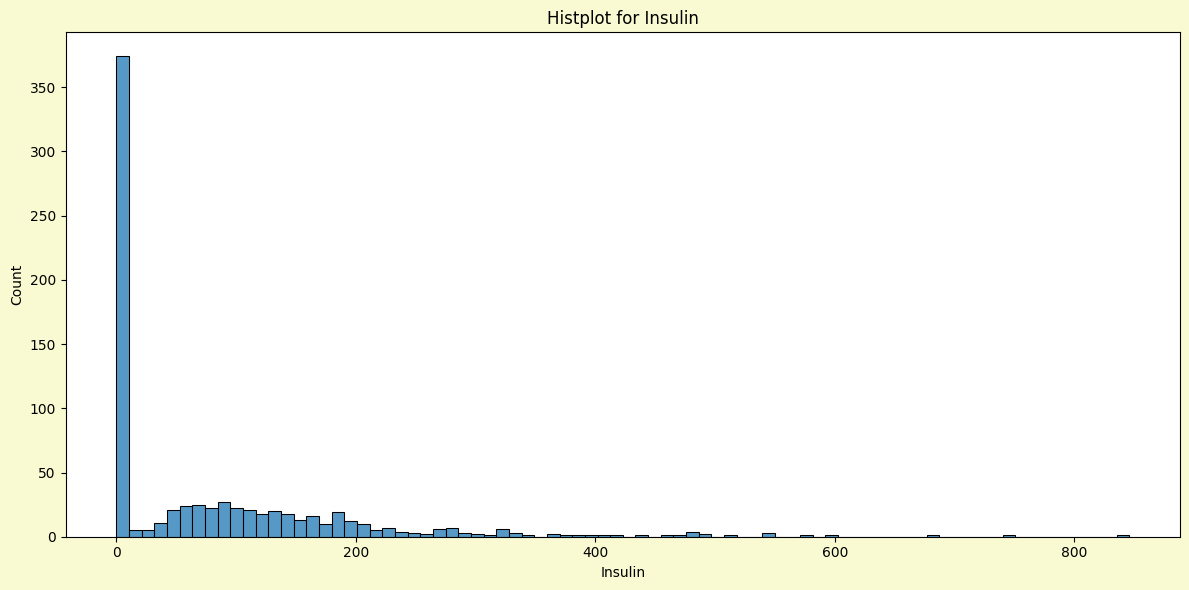

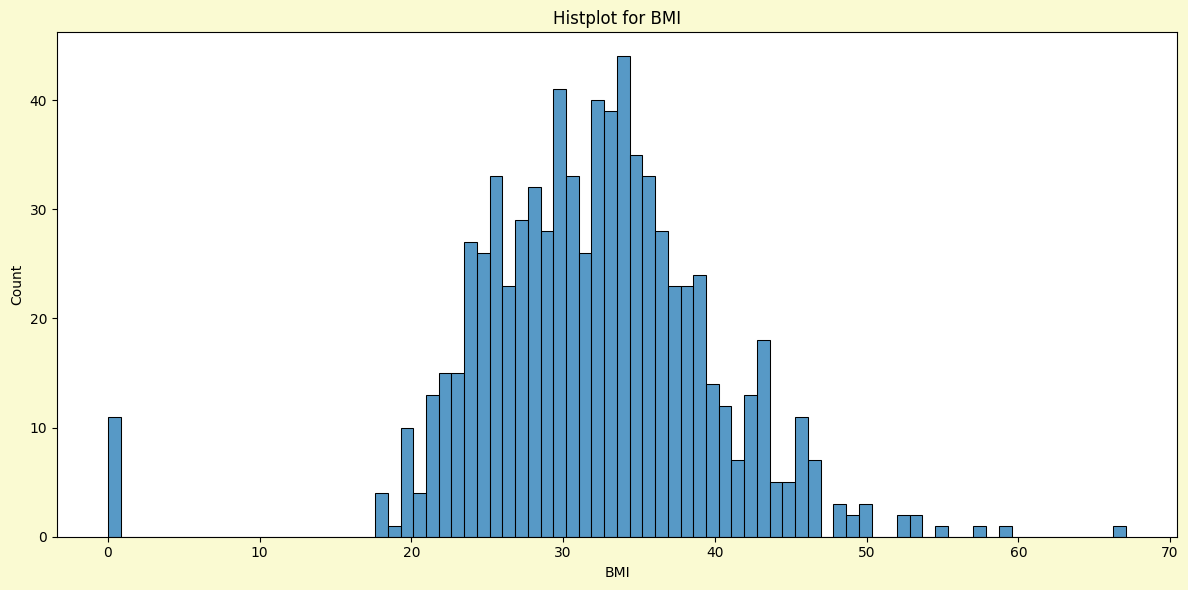

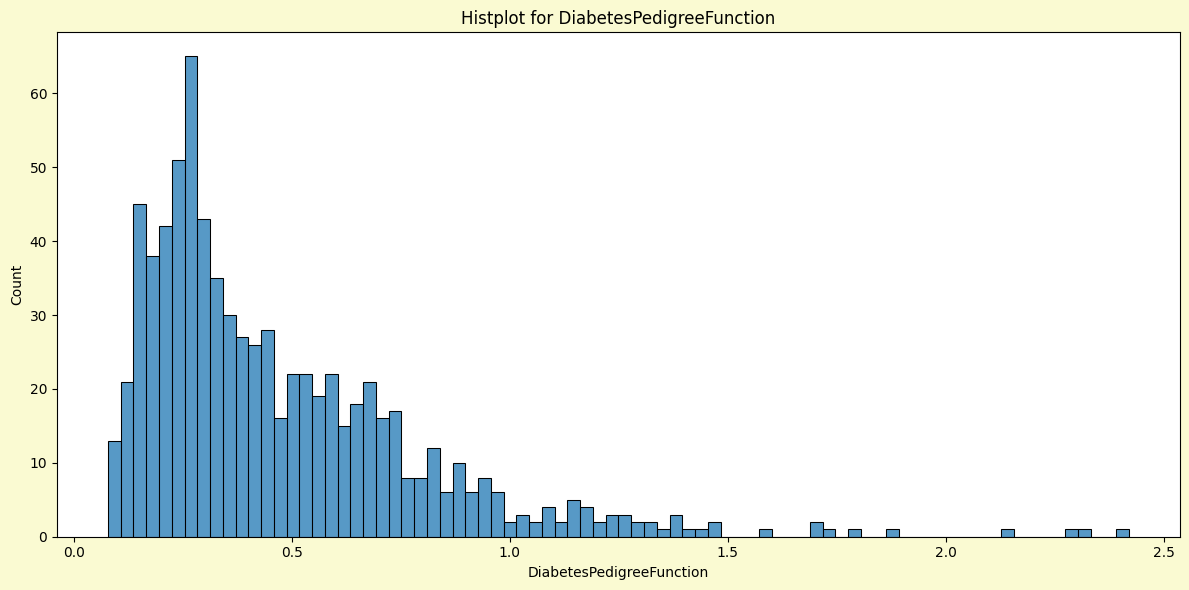

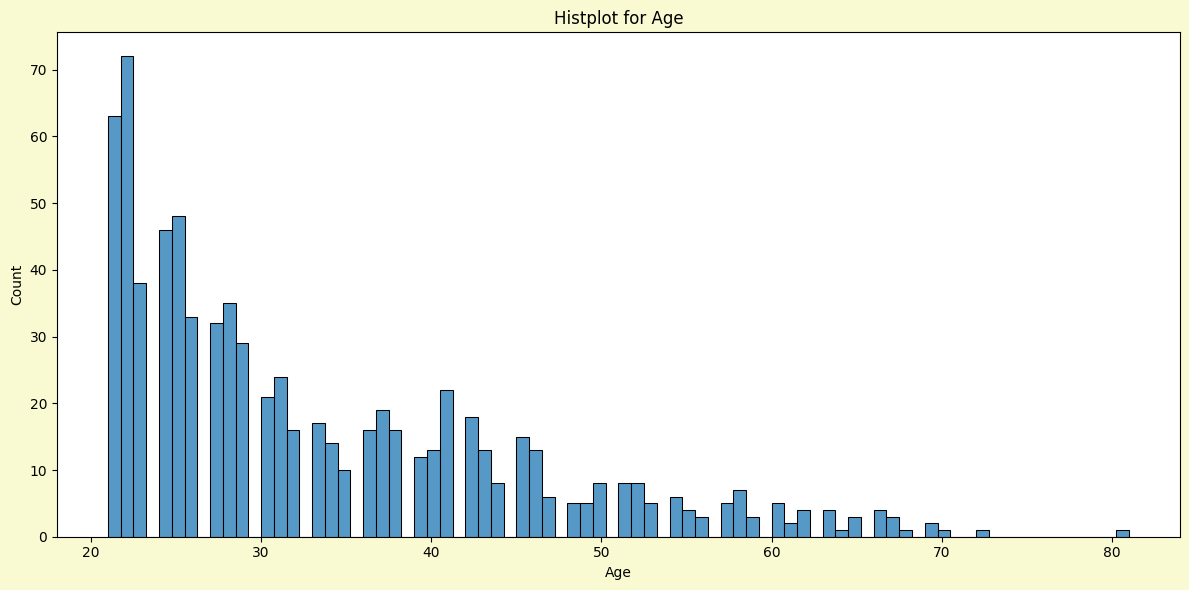

In [154]:
# ploting histplot for all the variable in dataset excluding target variable (Outcomes)
column_list = list(df.columns)[:-1]
column_list

for name in column_list:
  plt.figure(figsize = (12,6), facecolor = 'lightgoldenrodyellow')
  sns.histplot(data = df , x = df[name], bins = 80)
  plt.title(f"Histplot for {name}")
  plt.tight_layout()

plt.plot()
plt.show()

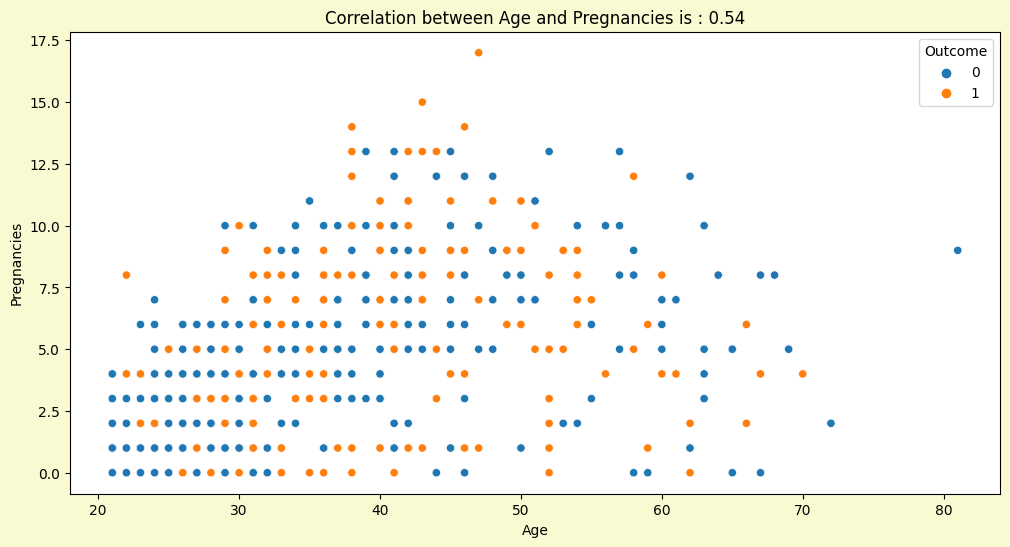

In [155]:
# ploting scatter plot for Age and Pregnancies
plt.figure(figsize = (12,6), facecolor = 'lightgoldenrodyellow')
sns.scatterplot(data = df , x = 'Age', y ='Pregnancies', hue = 'Outcome')
corr = round(np.corrcoef(x = df['Age'],y = df['Pregnancies'])[0][1],2)
plt.title(f"Correlation between Age and Pregnancies is : {corr}")
plt.plot()
plt.show()

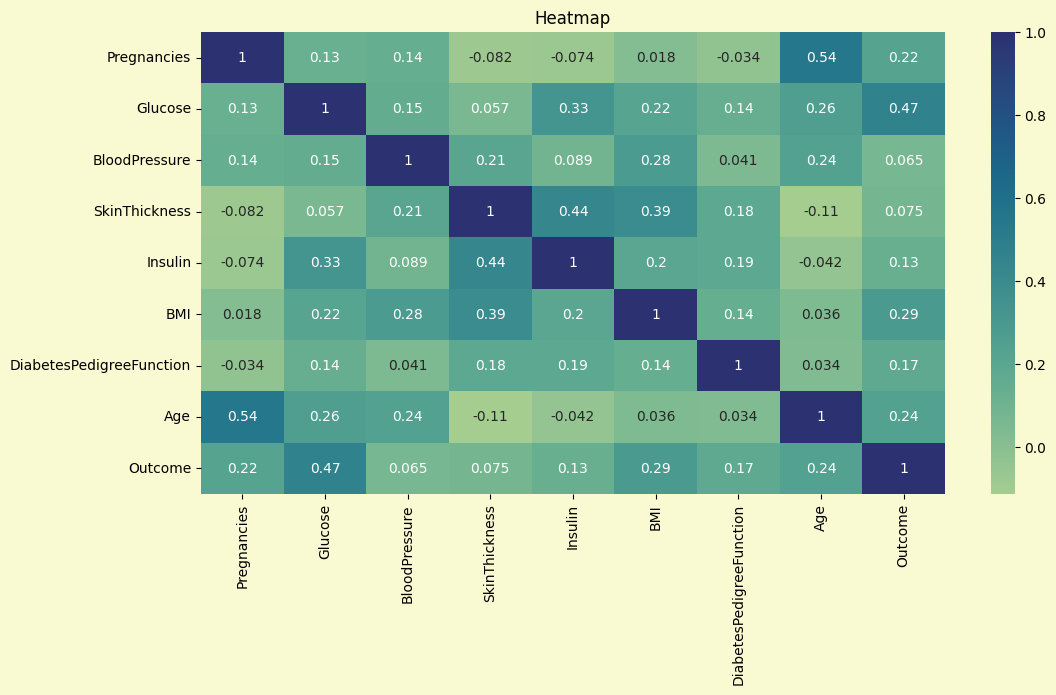

In [156]:
# ploting the heatmap for getting the co-relation of each variable with each other
plt.figure(figsize = (12,6), facecolor = 'lightgoldenrodyellow')
sns.heatmap(df.corr(), annot = True,cmap="crest")
plt.title("Heatmap")
plt.plot()
plt.show()

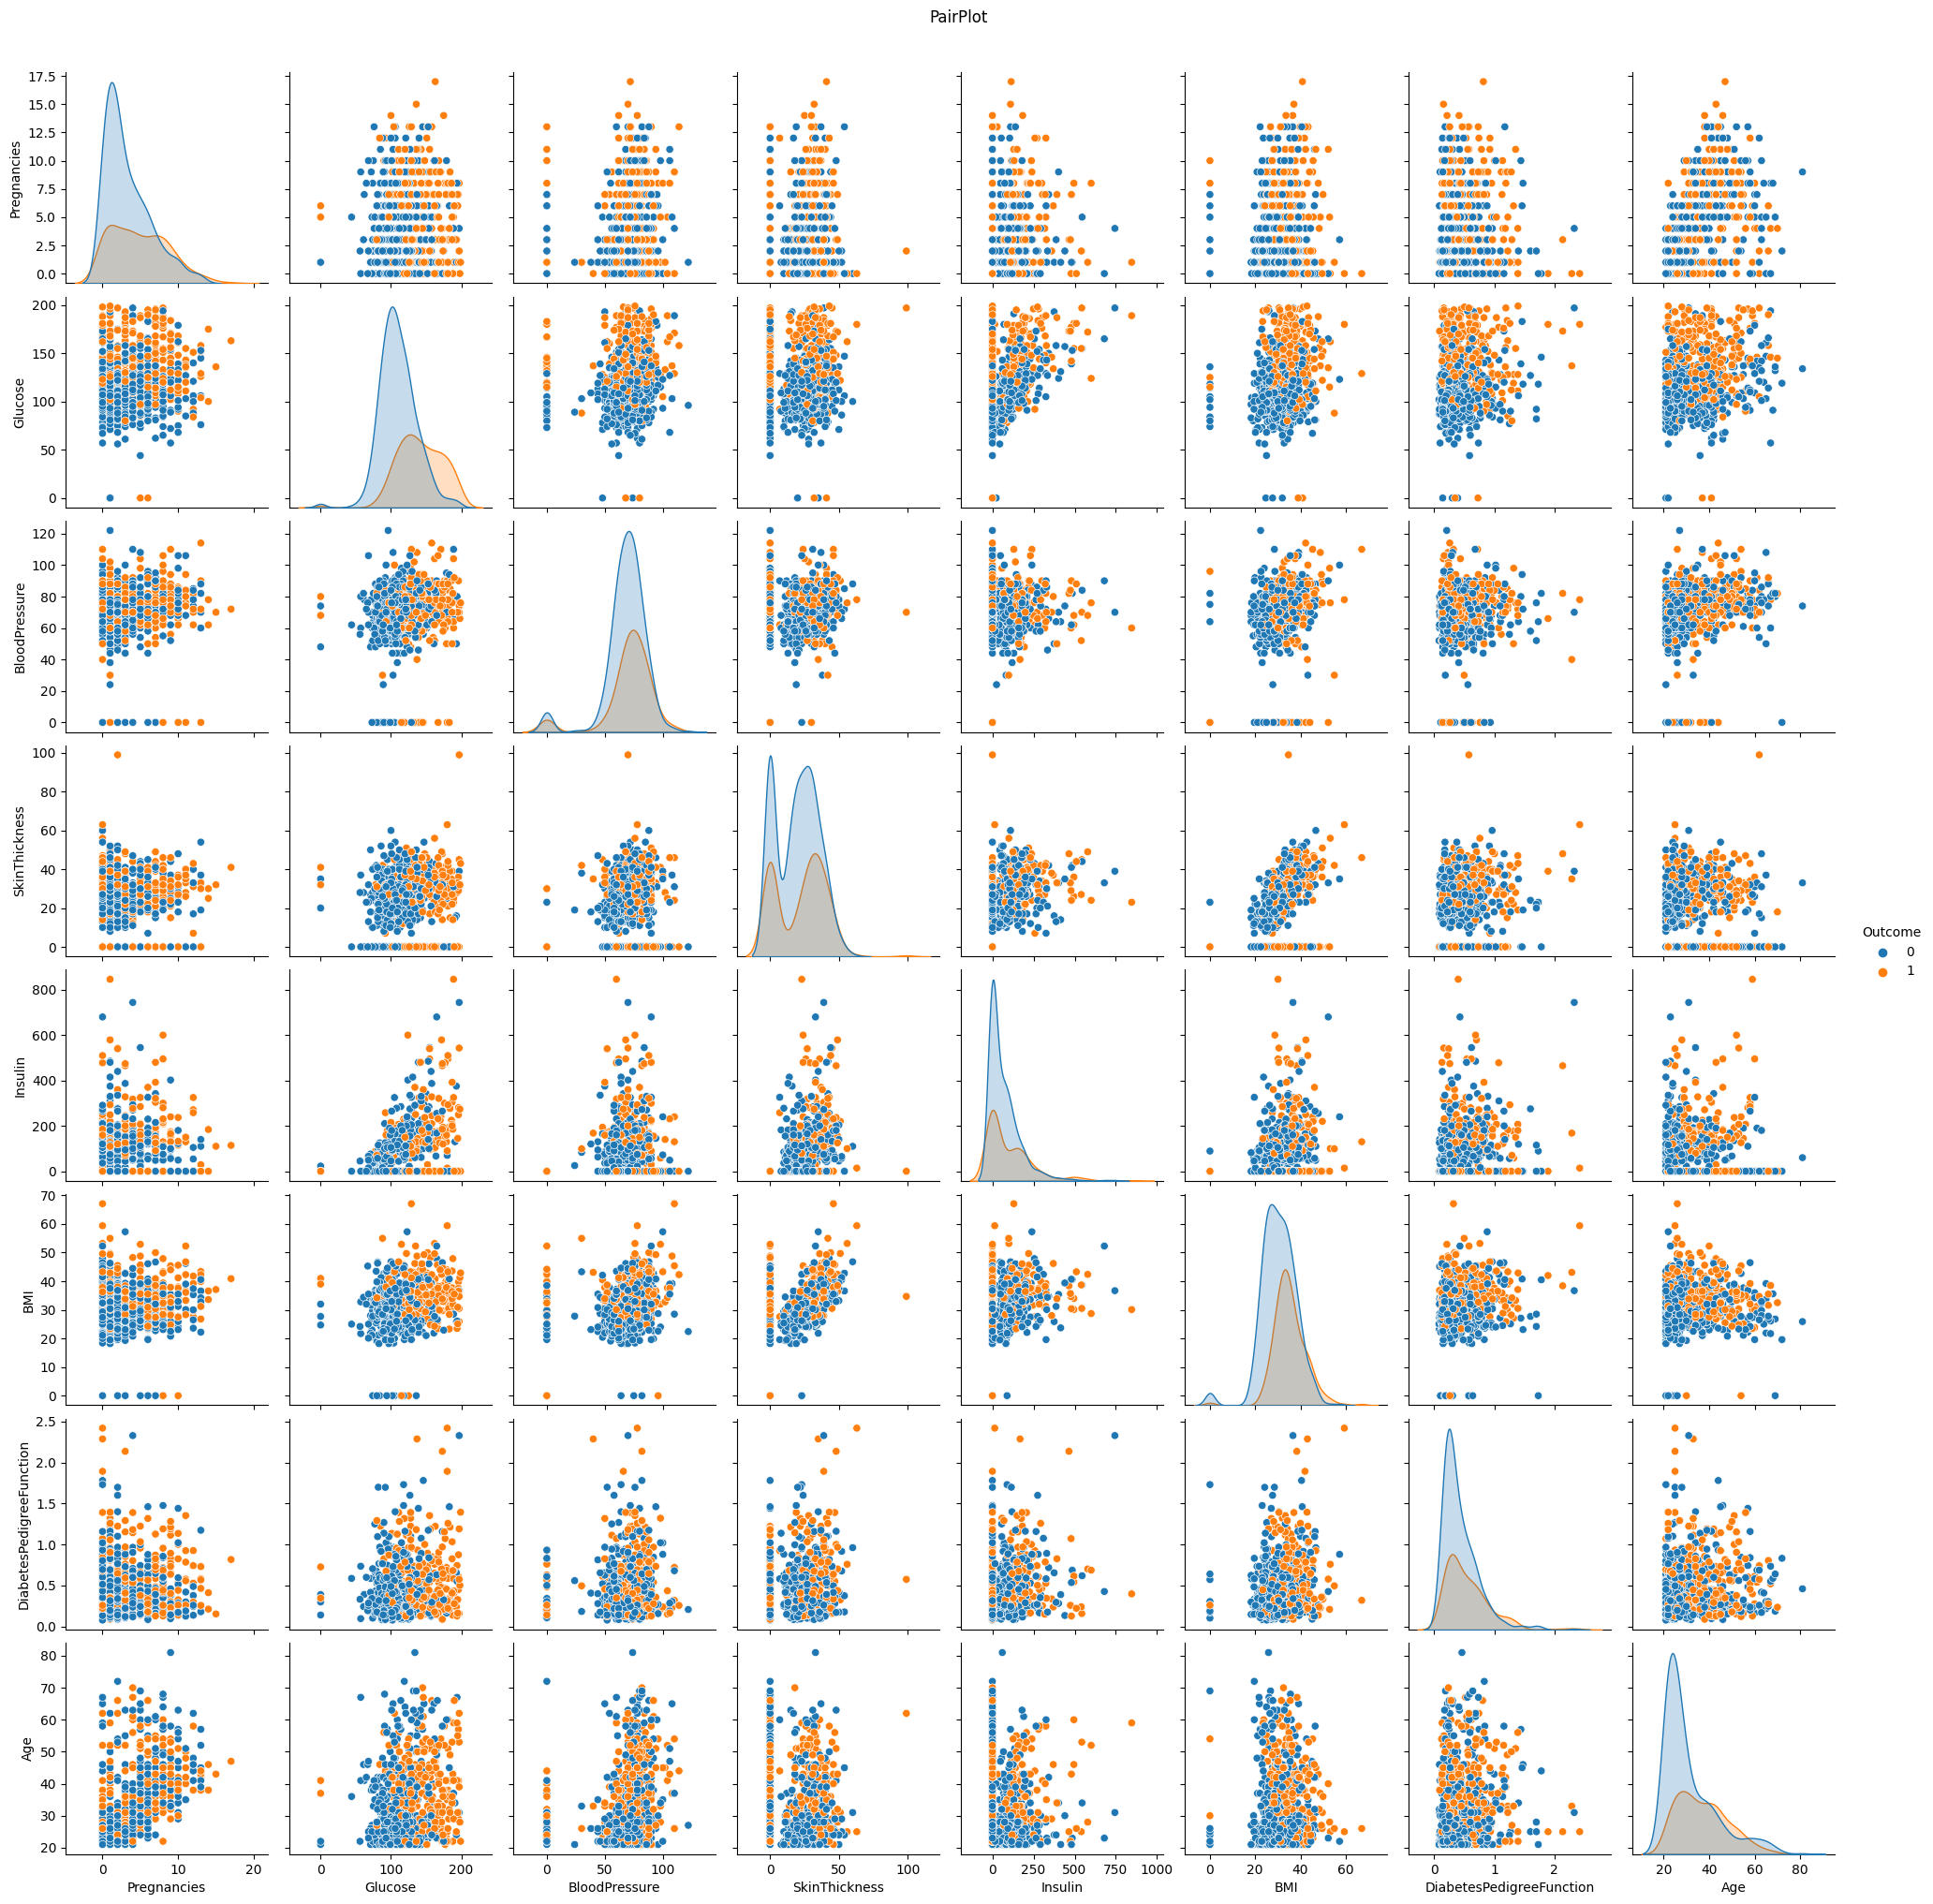

In [157]:
# Ploting the Pairplot
plt.rcParams['figure.autolayout'] == True
sns.pairplot(data =df, hue = 'Outcome', diag_kind = 'kde')
plt.suptitle("PairPlot", y= 1.02)
plt.show();

## **Data Pre-Processing and Feature Selection**

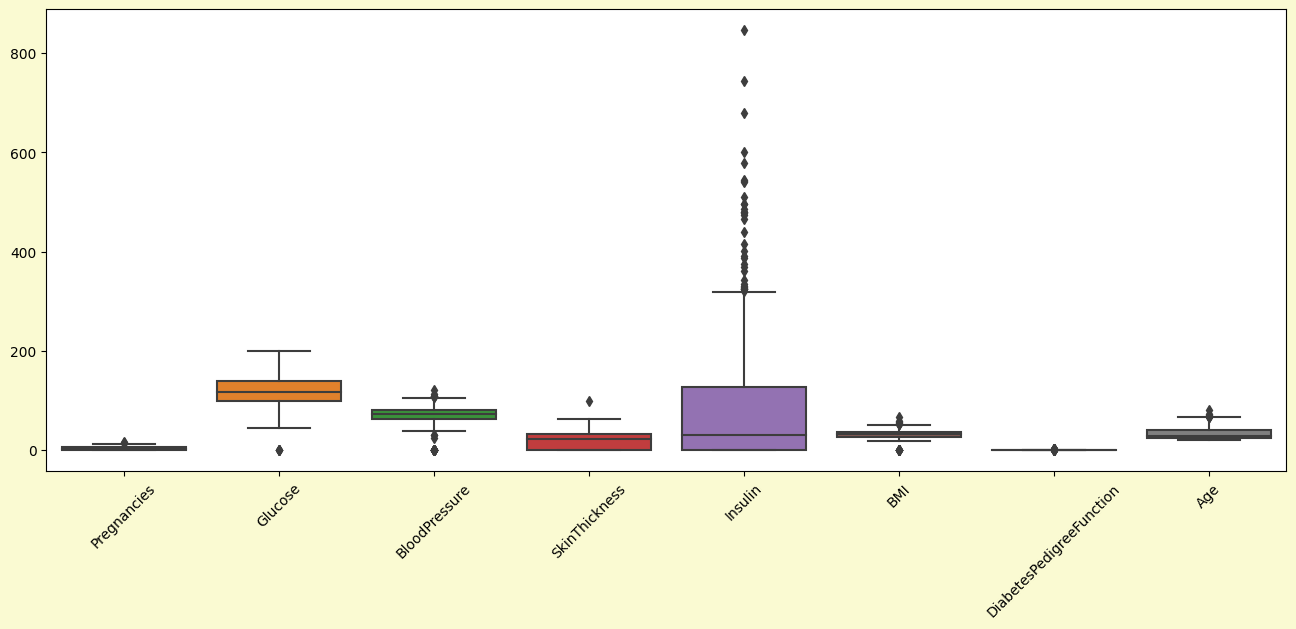

In [158]:
# Boxplot before handling the outliers
plt.figure(figsize = (16,6), facecolor = 'lightgoldenrodyellow')
sns.boxplot(data=df.drop('Outcome', axis=1))
plt.xticks(rotation=45)
plt.show()

In [159]:
# Calculate the lower and upper bounds for clipping
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
# Remove rows with outliers
df = df[~outliers]

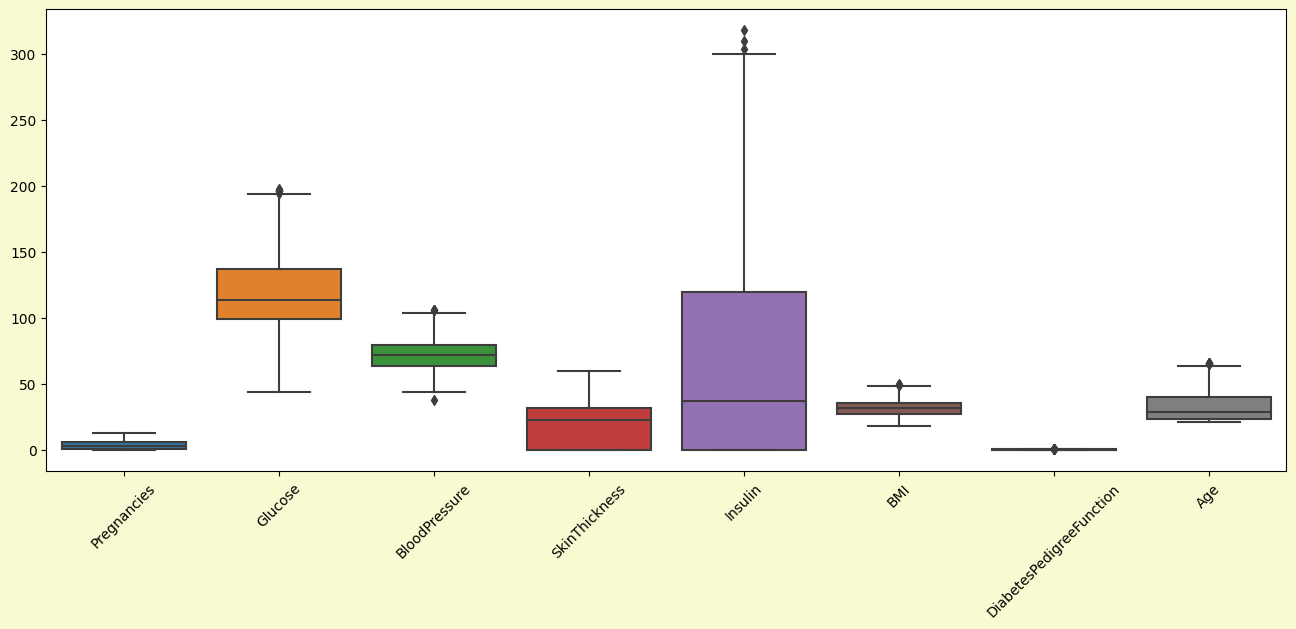

In [160]:
# Boxplot after handling the outliers
plt.figure(figsize = (16,6), facecolor = 'lightgoldenrodyellow')
sns.boxplot(data=df.drop('Outcome', axis=1))
plt.xticks(rotation=45)
plt.show()

In [161]:
# Separate features and target variable
x = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target


In [162]:
# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

* **Data Splitting**





In [163]:
# splitting the dataset into training and testing
x_train,x_test,y_train,y_test =train_test_split(x_scaled,y, test_size = 0.2,random_state = 42)

In [164]:
# Train shape
x_train.shape

(511, 8)

In [165]:
# test shape
x_test.shape

(128, 8)

In [166]:
# defining the function for checking the model performance
def print_evaluate(act,pred):
  Accuracy = accuracy_score(act,pred)
  F1 = f1_score(act,pred)
  precision = precision_score(act,pred)
  Recall = recall_score(act,pred)
  print("___________________________________")
  print(f'Accuracy Score : {Accuracy}')
  print(f"Precision Score : {precision}")
  print(f'Recall Score : {Recall}')
  print(f'F1 Score : {F1}')
  print('___________________________________')

## **Machine Learning**

### Model 1 - Logistic Regression

In [167]:
# Creating a Logistic Regression model
Log_model = LogisticRegression()

# Training the model
Log_model.fit(x_train,y_train)

# Making the prediction on training and tesing dataset
train_pred_L = Log_model.predict(x_train)
test_pred_L = Log_model.predict(x_test)

In [168]:
# printing model performance for training and testing dataset
print("Model performance on Training Dataset")
print_evaluate(y_train,train_pred_L)

print("Model performance on Testing Dataset")
print_evaluate(y_test,test_pred_L)

Model performance on Training Dataset
___________________________________
Accuracy Score : 0.786692759295499
Precision Score : 0.7235772357723578
Recall Score : 0.5426829268292683
F1 Score : 0.6202090592334495
___________________________________
Model performance on Testing Dataset
___________________________________
Accuracy Score : 0.828125
Precision Score : 0.8181818181818182
Recall Score : 0.5
F1 Score : 0.6206896551724137
___________________________________


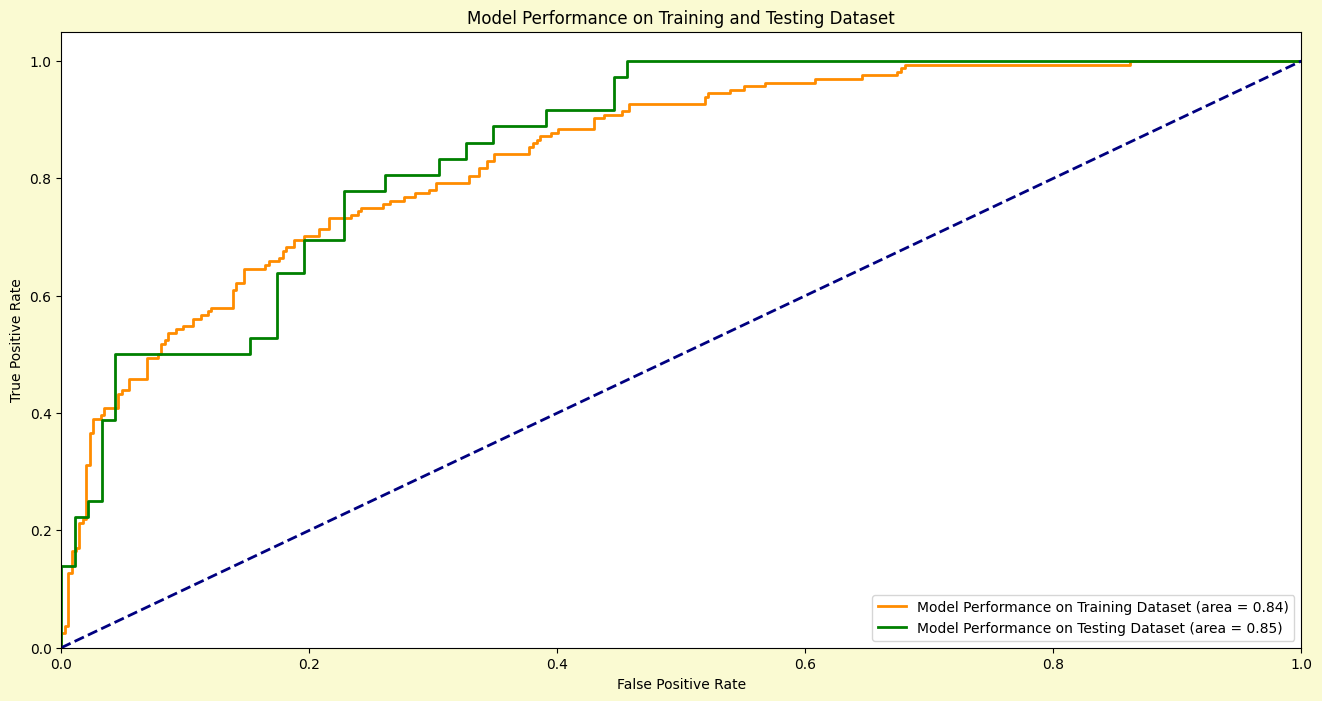

In [169]:
# calculating test and train pred proba
test_pred_prob = Log_model.predict_proba(x_test)[:, 1]
train_pred_prob = Log_model.predict_proba(x_train)[:,1]

# calculating ROC curve and AUC for testing dataset
fpr,tpr,_= roc_curve(y_test,test_pred_prob)
roc_auc = auc(fpr,tpr)

# calculating ROC curve and AUC for Training dataset
fpr1, tpr1, _ = roc_curve(y_train, train_pred_prob)
roc_auc1 = auc(fpr1,tpr1)

# Plot ROC curve
plt.figure(figsize = (16,8), facecolor = 'lightgoldenrodyellow')
plt.plot(fpr1,tpr1, color = 'darkorange', lw= 2 , label = 'Model Performance on Training Dataset (area = %0.2f)'%roc_auc1)
plt.plot(fpr, tpr, color='green', lw=2, label='Model Performance on Testing Dataset (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Performance on Training and Testing Dataset')
plt.legend(loc="lower right")
plt.show()

#### **Cross Validation and Hyperparameter Tunning**

In [170]:
# defining the model
logreg = LogisticRegression()

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type (L1 or L2)
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithm
    'max_iter': [100, 500, 1000],  # Maximum number of iterations
}

# performing hyperparameter tunning
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# printing the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [171]:
# Evaluate the model with best parameters on the test and train set
best_log_model = grid_search.best_estimator_
best_test_pred_l = best_log_model.predict(x_test)
best_train_pred_l = best_log_model.predict(x_train)

# printing model performance on train and test set after cross validation and hyperparameter tunning
print("Model Performance on Training Dataset")
print_evaluate(y_train,best_train_pred_l)
print("Model Performance on Testing Dataset")
print_evaluate(y_test,best_test_pred_l)

Model Performance on Training Dataset
___________________________________
Accuracy Score : 0.786692759295499
Precision Score : 0.7235772357723578
Recall Score : 0.5426829268292683
F1 Score : 0.6202090592334495
___________________________________
Model Performance on Testing Dataset
___________________________________
Accuracy Score : 0.8203125
Precision Score : 0.782608695652174
Recall Score : 0.5
F1 Score : 0.6101694915254238
___________________________________


*  **I have performed cross-validation and hyperparameter tuning for logistic regression but haven't observed any improvement in model performance**

### Model 2 - Random Forest Classifier

In [172]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test and train set
train_pred_rf = rf_classifier.predict(x_train)
test_pred_rf = rf_classifier.predict(x_test)

In [173]:
# printing model performance on training and testing dataset

print('Model Performance on Training Dataset')
print_evaluate(y_train,train_pred_rf)

print('Model Performance on Testing Dataset')
print_evaluate(y_test,test_pred_rf)

Model Performance on Training Dataset
___________________________________
Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0
___________________________________
Model Performance on Testing Dataset
___________________________________
Accuracy Score : 0.796875
Precision Score : 0.6785714285714286
Recall Score : 0.5277777777777778
F1 Score : 0.5937499999999999
___________________________________


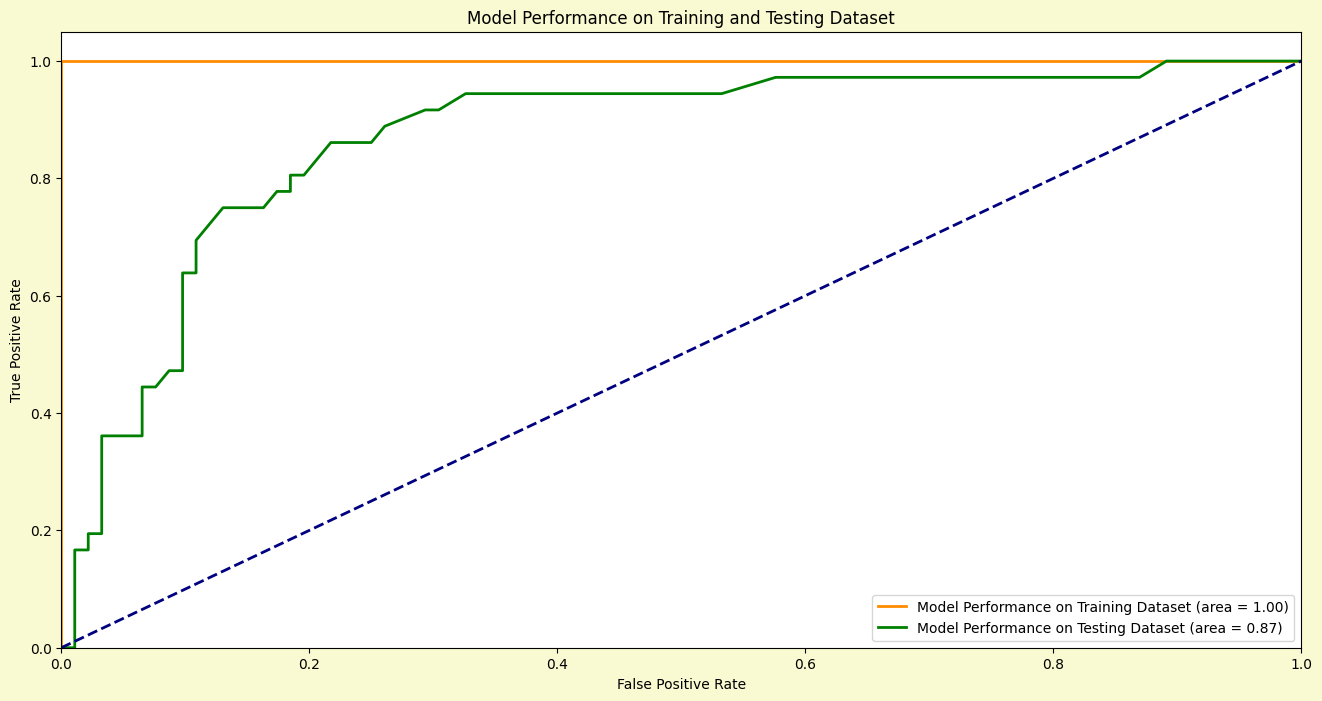

In [174]:
# calculating test and train pred proba
train_pred_prob = rf_classifier.predict_proba(x_train)[:,1]
test_pred_prob = rf_classifier.predict_proba(x_test)[:, 1]

# calculating ROC curve and AUC for Training dataset
fpr1, tpr1, _ = roc_curve(y_train, train_pred_prob)
roc_auc1 = auc(fpr1,tpr1)

# calculating ROC curve and AUC for testing dataset
fpr,tpr,_= roc_curve(y_test,test_pred_prob)
roc_auc = auc(fpr,tpr)

# Plot ROC curve
plt.figure(figsize = (16,8), facecolor = 'lightgoldenrodyellow')
plt.plot(fpr1,tpr1, color = 'darkorange', lw= 2 , label = 'Model Performance on Training Dataset (area = %0.2f)'%roc_auc1)
plt.plot(fpr, tpr, color='green', lw=2, label='Model Performance on Testing Dataset (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Performance on Training and Testing Dataset')
plt.legend(loc="lower right")
plt.show()

Upon training a Random Forest classifier on our diabetes dataset, we observed a stark difference in performance between the training and testing datasets. The model achieved an accuracy score of 1.0 on the training dataset, indicating that it was able to perfectly fit the training data. However, when applied to the unseen testing dataset, the accuracy dropped to 87%. This discrepancy between training and testing performance suggests that the model might be overfitting to the training data.

To address this issue, we have taken proactive steps by deciding to perform cross-validation and hyperparameter tuning on the Random Forest algorithm. Cross-validation involves partitioning the data into multiple subsets and iteratively training and validating the model on different combinations of these subsets. This process provides a more robust estimate of the model's performance on unseen data, helping us to detect overfitting and obtain a more accurate assessment of its generalization ability.


# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***